Data Preparation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
file_path = '/content/Global YouTube Statistics.csv'
youtube_data = pd.read_csv(file_path, encoding='latin1')

# Convert 'subscribers' and 'video views' to integers for analysis
youtube_data['subscribers'] = youtube_data['subscribers'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)
youtube_data['video views'] = youtube_data['video views'].apply(lambda x: int(x.replace(',', '')) if isinstance(x, str) else x)

# Group countries for the pie chart
country_counts = youtube_data['Country'].value_counts()
top_countries = country_counts.head(5)
other_count = pd.Series(country_counts[5:].sum(), index=['Other'])
top_countries = pd.concat([top_countries, other_count])


Statistical analysis

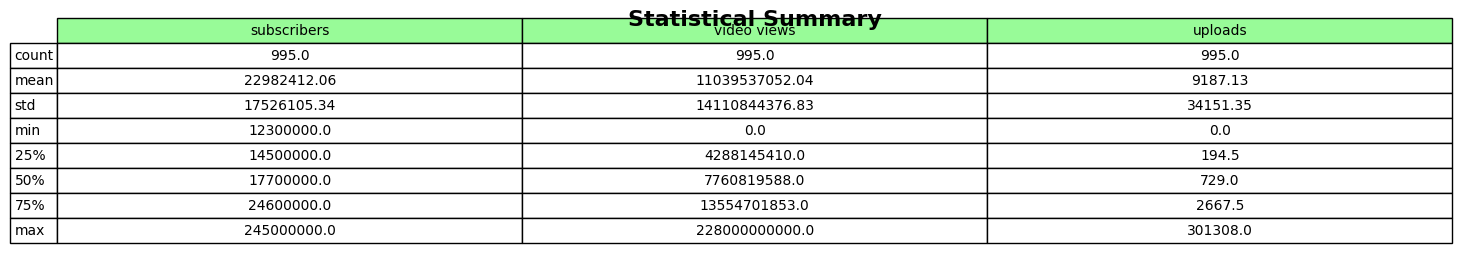

In [25]:
# Simplified statistical summary for better readability and cleaner look
stat_summary = youtube_data.describe().round(2)

# Selecting a few columns for readability
selected_columns = ['subscribers', 'video views', 'uploads']
stat_summary_selected = stat_summary[selected_columns]

# Creating a colored table figure
fig, ax = plt.subplots(figsize=(12, 2))  # Adjusted width and height
ax.axis('off')
the_table = ax.table(cellText=stat_summary_selected.values,
                     colLabels=stat_summary_selected.columns,
                     rowLabels=stat_summary_selected.index,
                     loc='center',
                     cellLoc='center',
                     colColours=["palegreen"]*len(selected_columns))  # Apply color to columns

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)  # Adjust font size as needed
the_table.scale(1.5, 1.5)  # Adjust scale as needed

plt.title('Statistical Summary', fontweight='bold', fontsize=16, pad=20)
plt.show()



Trend Line of Subscribers by Rank Plot Code


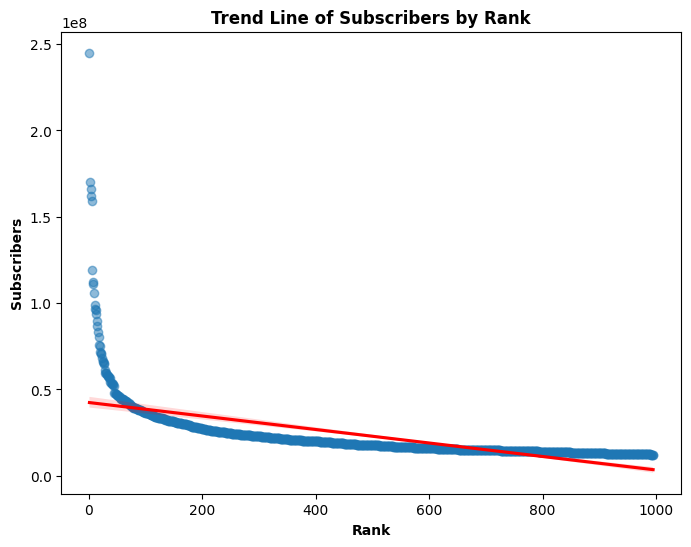

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend line for Subscribers over the ranks
plt.figure(figsize=(8, 6))
sns.regplot(x='rank', y='subscribers', data=youtube_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trend Line of Subscribers by Rank', fontweight='bold')
plt.xlabel('Rank', fontweight='bold')
plt.ylabel('Subscribers', fontweight='bold')
plt.show()


Top Categories by Video Views Plot Code


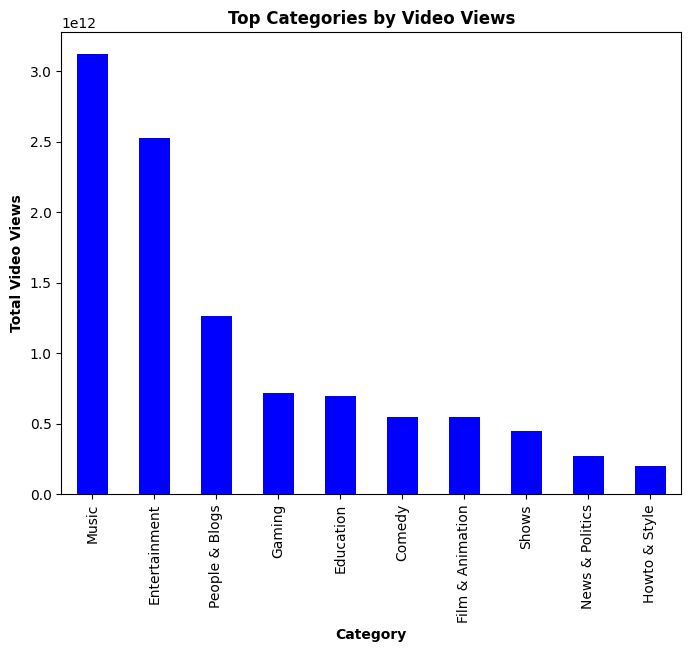

In [27]:
# Bar plot for top 10 categories by video views
top_categories = youtube_data.groupby('category').sum().sort_values(by='video views', ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_categories['video views'].plot(kind='bar', color='blue')
plt.title('Top Categories by Video Views', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Total Video Views', fontweight='bold')
plt.show()


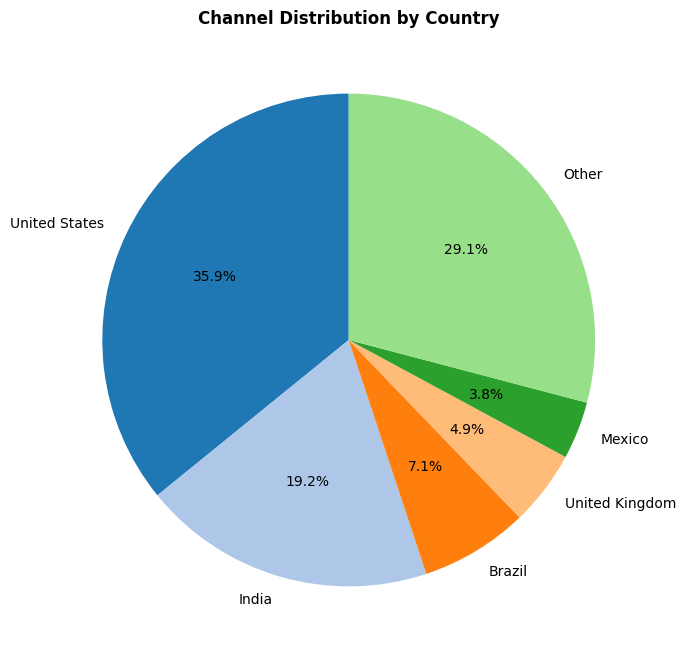

In [28]:

# Group countries for the pie chart
country_counts = youtube_data['Country'].value_counts()
top_countries = country_counts.head(5)
other_count = pd.Series(country_counts[5:].sum(), index=['Other'])
top_countries_with_other = pd.concat([top_countries, other_count])

# Define a custom color palette for the pie chart
colors = plt.get_cmap('tab20').colors

# Pie chart for the distribution of channels by top 5 countries + Other
plt.figure(figsize=(8, 8))
plt.pie(top_countries_with_other, labels=top_countries_with_other.index, autopct='%1.1f%%', colors=colors[:6], startangle=90)
plt.title('Channel Distribution by Country', fontweight='bold')
plt.show()

